# Compare Classifiers
Included so far:
- SVM
- LSTM
- Gradient Boost
- AdaBoost
- Random Forest
- KNN

In [1]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# to enable local imports
module_path = os.path.abspath('../code')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

    
from pathlib import Path
try:
    try:
        json_path = (Path(os.getenv('LOCALAPPDATA'))/'Dropbox'/'info.json').resolve()
    except FileNotFoundError:
        json_path = (Path(os.getenv('APPDATA'))/'Dropbox'/'info.json').resolve()

    with open(str(json_path)) as f:
        j = json.load(f)

    personal_dbox_path = Path(j['personal']['path'])
    # Save the images directly into the dropbox where the overleaf document is stored
    IMAGES_PATH = os.path.join(str(personal_dbox_path), 'Apps', 'Overleaf', 'Masterthesis_Paper', 'images')

except Exception as e:
    IMAGES_PATH = "../images"
    
print("Saving images to: {}".format(IMAGES_PATH))
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches='tight')

from machine_learning_load_data import loadOnlineEEGdata
from utils import loadTargetLabelsTxt

/home/nvidia/masterthesis/thesis_eeg/code
Saving images to: ../images


In [2]:
# Load some online EEG Data
eegData, freqData, entropyData = loadOnlineEEGdata(dirPath='../../EEG_Data/eeg_data_online', splitData=True)
eegX_train, eegy_train, eegX_test, eegy_test = eegData
freqX_train, freqy_train, freqX_test, freqy_test = freqData
X_train_entropy, y_train_entropy, X_test_entropy, y_test_entropy = entropyData

# reshape
freqX_train = freqX_train.reshape(freqX_train.shape[0], freqX_train.shape[2])
freqX_test = freqX_test.reshape(freqX_test.shape[0], freqX_test.shape[2])

X_train_entropy = X_train_entropy.reshape(X_train_entropy.shape[0], X_train_entropy.shape[2])
X_test_entropy = X_test_entropy.reshape(X_test_entropy.shape[0], X_test_entropy.shape[2])

targetLabelsDict = loadTargetLabelsTxt(filePath='../../EEG_Data/eeg_data_online/target_labels.txt')
targetNames = ['Fatigue ({})'.format(targetLabelsDict['FATIGUE']),
               'Normal ({})'.format(targetLabelsDict['NORMAL'])]


Loading Online EEG Data from ../../EEG_Data/eeg_data_online ...
EEG Data Shape:
(5024, 512, 40) (5024,) (2154, 512, 40) (2154,)
Freq Data Shape:
(1008, 1, 1200) (1008,) (432, 1, 1200) (432,)
Entropy Data Shape:
(5024, 1, 200) (5024,) (2154, 1, 200) (2154,)


### Create Models

In [4]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

randomState = 42
modelList = []

# LSTM - takes a lot of time...
def create_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#modelList.append(("LSTM", "predict_proba", KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)))

# Gradient Boost
modelList.append(("Gradient Boost", "decision_function", GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                                                                   learning_rate=0.1, loss='deviance', max_depth=3,
                                                                                   max_features=None, max_leaf_nodes=None,
                                                                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                                                                   min_samples_leaf=1, min_samples_split=2,
                                                                                   min_weight_fraction_leaf=0.0, n_estimators=1000,
                                                                                   n_iter_no_change=None, presort='deprecated',
                                                                                   random_state=None, subsample=1.0, tol=0.0001,
                                                                                   validation_fraction=0.1, verbose=0,
                                                                                   warm_start=False)))

# AdaBoost
modelList.append(("Ada Boost", "decision_function", AdaBoostClassifier(n_estimators=500 , learning_rate=1)))

# SVM
modelList.append(("SVM", "decision_function", svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=randomState, shrinking=True,
  tol=0.001, verbose=False)))

# Random Forest
modelList.append(("Random Forest", "predict_proba", RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                                                           criterion='entropy', max_depth=None, max_features='log2',
                                                                           max_leaf_nodes=None, max_samples=None,
                                                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                                                           min_samples_leaf=1, min_samples_split=2,
                                                                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                                                                           n_jobs=None, oob_score=False, random_state=None,
                                                                           verbose=0, warm_start=False)))

# KNN
modelList.append(("KNN", "predict_proba", KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                                               metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                                                               weights='distance')))

# Multi Layer Perceptron
modelList.append(("Multi layer perceptron", "predict_proba", MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                                                                          beta_2=0.999, early_stopping=False, epsilon=1e-08,
                                                                          hidden_layer_sizes=(2, 100), learning_rate='constant',
                                                                          learning_rate_init=0.001, max_fun=15000, max_iter=200,
                                                                          momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                                                                          power_t=0.5, random_state=None, shuffle=True, solver='adam',
                                                                          tol=0.0001, validation_fraction=0.1, verbose=False,
                                                                          warm_start=False)))


# Decision Tree
modelList.append(('Decision Tree', 'predict_proba', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                                                           max_depth=None, max_features=None, max_leaf_nodes=None,
                                                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                                                           min_samples_leaf=1, min_samples_split=2,
                                                                           min_weight_fraction_leaf=0.0, presort='deprecated',
                                                                           random_state=None, splitter='random')))


Using TensorFlow backend.
/home/nvidia/venv/ml/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nvidia/venv/ml/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nvidia/venv/ml/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nvidia/venv/ml/lib/python3.5/site-packages/tensorflow/py

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

def plot_roc_curve(fpr, tpr, label=None, title="ROC Curve"):
    plt.title(title)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)  

def evaluteModelsWithRocCurve(modelList, X, y, title, target_names, kFoldTimes=5):
    print("X shape: {}".format(X.shape))
    print("y shape: {}".format(y.shape))
    
    title = title + " - k-fold times: {}".format(kFoldTimes)
    
    n_timesteps, n_features, n_outputs = 1, X.shape[1], 2
    plt.figure(figsize=(8, 6))

    for modelName, method, model in modelList:

        try:
            if modelName == "LSTM":
                y_predict = cross_val_predict(model, X.reshape(X.shape[0], 1, X.shape[1]), y, cv=kFoldTimes, method=method, n_jobs=-1)
            else:
                y_predict = cross_val_predict(model, X, y, cv=kFoldTimes, method=method, n_jobs=-1)



            if method == 'predict_proba':
                y_scores = y_predict[:, 1] # score = proba of positive class
                fpr, tpr, thresholds = roc_curve(y, y_scores)

            elif method == 'decision_function':
                fpr, tpr, thresholds = roc_curve(y, y_predict)

            else:
                print("Method '{}' not supported yet!".format(method))

            plot_roc_curve(fpr, tpr, modelName, title=title)
        except Exception as e:
            print ("Error with model: {}".format(modelName))
            raise(e)
    try:
        print(classification_report(y, y_predict, target_names=target_names))
    except Exception as e:
        print(e)
    
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()
    save_fig(title)

X shape: (5024, 200)
y shape: (5024,)
Classification metrics can't handle a mix of binary and multilabel-indicator targets


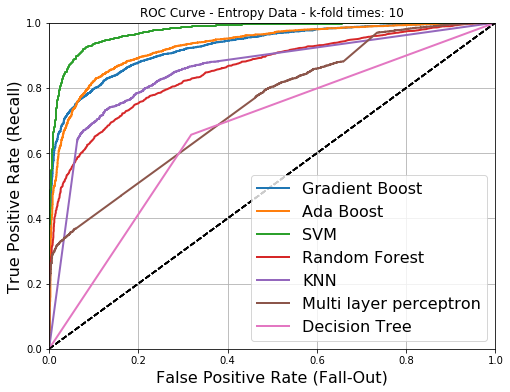

Saving figure ROC Curve - Entropy Data - k-fold times: 10


<Figure size 432x288 with 0 Axes>

In [6]:
evaluteModelsWithRocCurve(modelList, X=X_train_entropy, y=y_train_entropy,
                          title="ROC Curve - Entropy Data", target_names=targetNames,
                          kFoldTimes=10)

X shape: (1008, 1200)
y shape: (1008,)
Classification metrics can't handle a mix of binary and multilabel-indicator targets


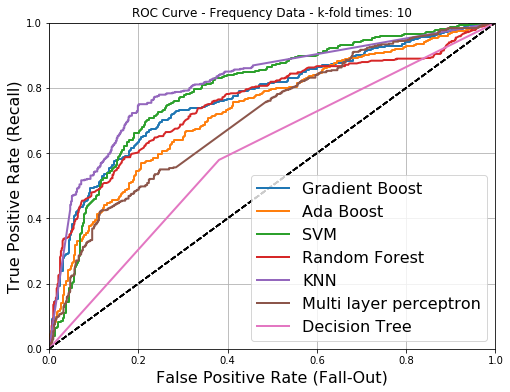

Saving figure ROC Curve - Frequency Data - k-fold times: 10


<Figure size 432x288 with 0 Axes>

In [7]:
evaluteModelsWithRocCurve(modelList, X=freqX_train, y=freqy_train,
                          title="ROC Curve - Frequency Data",
                          target_names=targetNames, kFoldTimes=10)